<a href="https://colab.research.google.com/github/olavocarvalho/ada-cielo-frontend-challenge/blob/master/ML_Checkpoint_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [67]:
# IMPORTS

# GDRIVE
from google.colab import drive

## GENERAL
import pandas as pd
import numpy as np

# Linear Regression
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Charts
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import probplot, boxcox
from scipy.special import inv_boxcox
import pylab
sns.set()

# Load the dataset

In [69]:
# LOAD THE DATASET
# Mount Google Drive
drive.mount('/content/gdrive')

# File path
path = '/content/gdrive/My Drive/fiap/year_1/machine_learning/datasets/aluguel.csv'

# Loading the dataset
df = pd.read_csv(path, sep=";")

print(f'# of lines   : {df.shape[0]}')
print(f'# of columns : {df.shape[1]}')
print('-----------------------')
print('Null Counting')
print(df.isnull().sum())

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
# of lines   : 10685
# of columns : 13
-----------------------
Null Counting
cidade              0
area                0
quartos             0
banheiros           0
vagas_garagem       0
andar               0
aceita_animal       0
mobiliaria          0
valor_condominio    0
valor_aluguel       0
valor_iptu          0
valor_seguro        0
valor_total         0
dtype: int64


In [62]:
df.head(10)

,cidade,area,quartos,banheiros,vagas_garagem,andar,aceita_animal,mobiliaria,valor_condominio,valor_aluguel,valor_iptu,valor_seguro,valor_total
0,São Paulo,70,2,1,1,7,1,1,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,1,0,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,1,0,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,1,0,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,0,0,0,800,25,11,836
5,São Paulo,376,3,3,7,0,1,0,0,8000,834,121,8955
6,Rio de Janeiro,72,2,1,0,7,1,0,740,1900,85,25,2750
7,São Paulo,213,4,4,4,4,1,0,2254,3223,1735,41,7253
8,São Paulo,152,2,2,1,3,1,1,1000,15000,250,191,16440
9,Rio de Janeiro,35,1,1,0,2,1,1,590,2300,35,30,2955


# Analyzing the target (Rent)


In [70]:
print(f"Rent Mean    : {round(df['valor_aluguel'].mean(), 2)}")
print(f"Rent Median  : {round(df['valor_aluguel'].median(), 2)}")
print(f"Highest Rent : {df['valor_aluguel'].max()}")
print(f"Lowest Rent  : {df['valor_aluguel'].min()}")

Rent Mean    : 3890.42
Rent Median  : 2650.0
Highest Rent : 30000
Lowest Rent  : 450


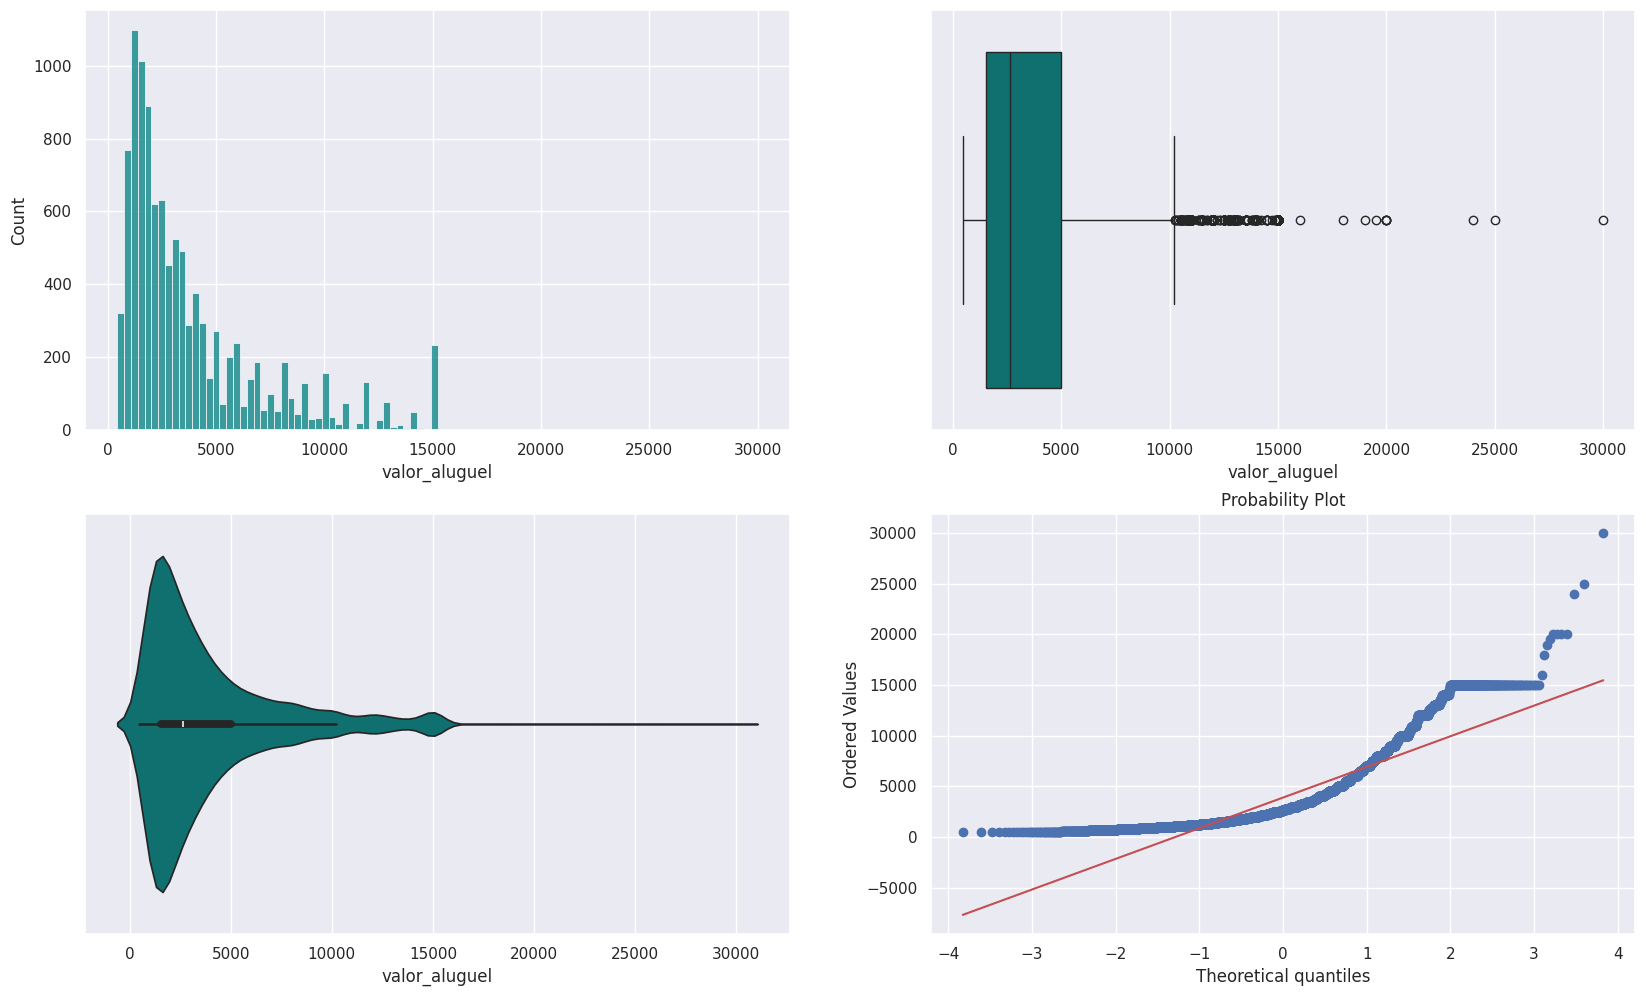

In [68]:
fig, ax = plt.subplots(2, 2, figsize=(20, 12))
ax1 = sns.histplot(x = df['valor_aluguel'], color='teal', ax= ax[0, 0])
ax2 = sns.boxplot(x = df['valor_aluguel'], ax= ax[0, 1], color= 'teal')
ax3 = sns.violinplot(x = df['valor_aluguel'], ax= ax[1, 0], color= 'teal')
ax4 = probplot(df['valor_aluguel'], plot=pylab)
pylab.show()

# Analysis
No primeiro plot podemos obersar que a variável a ser prevista apresenta assimetria positiva acentuada o que indica que modelos lineares não poderáo prevê-la com eficiência.

No segundo plot, o box-plot deixa evidente que existem outliers.

No quarto plot (QQ plot) é possível identificar como a variável se comparada à uma distribuição normal.

Como ponto de partida, utiliaremos a Regressão Linear como ponto de partida para entender como os dados se comportam em um modelo linear.

# Linear Regression Model A
With only one feature (area)

In [64]:
# Split the dataframe
x = df[["area"]]
y = df["valor_aluguel"]

# Split data for training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

# Run the model
modelA = LinearRegression()
modelA.fit(x_train, y_train)
y_hat = modelA.predict(x_test)

# Find MSE
modelA_mse = mean_squared_error(y_test, y_hat)
print(modelA_mse)

10352386.691932349


## Analysis
Sendo o maior aluguel `R$30.000` e o menor `R$450`, o Mean Squared Error (MSE) de 10.352.386 pode ser avaliado como alto e não está bom o suficiente para ser utilizado. Uma alternativa para melhorar a interpretação pode ser calcular o RMSE para trazer o erro para a mesma ordem de grandeza que a variável alvo.

# Linear Regression Model B
Added one more feature to the regression (furnished)

In [66]:
# Split the dataframe
x = df[["area", "mobiliaria"]]
y = df["valor_aluguel"]

# Split data for training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

# Run the model
modelB = LinearRegression()
modelB.fit(x_train, y_train)
y_hat = modelB.predict(x_test)

# Find MSE
modelB_mse = mean_squared_error(y_test, y_hat)
print(f'Model B MSE : {modelB_mse}' )
print(f'Model B ▲ A : {round((modelB_mse / modelA_mse), 2)}')

Model B MSE : 10073430.409762671
Model B ▲ A : 0.97


## Analysis
Com uma nova feature indica que, com essa variável adicional, o modelo consegue prever os valores reais com um erro médio menor mas sem uma melhora significativa.

In [ ]:
# Split the dataframe
x = df[["area", "mobiliaria", "quartos"]]
y = df["valor_aluguel"]

# Split data for training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

# Run the model
modelC = LinearRegression()
modelC.fit(x_train, y_train)
y_hat = modelC.predict(x_test)

# Find MSE
modelC_mse = mean_squared_error(y_test, y_hat)
print(modelC_mse)

6996422.925958624


# Linear Regression Model C
Added one more feature to the regression (# of bedrooms)

In [65]:
# Split the dataframe
x = df[["area", "mobiliaria", "quartos"]]
y = df["valor_aluguel"]

# Split data for training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

# Run the model
modelC = LinearRegression()
modelC.fit(x_train, y_train)
y_hat = modelC.predict(x_test)

# Find MSE
modelC_mse = mean_squared_error(y_test, y_hat)
print(modelC_mse)
print(f'Model B ▲ A : {round((modelC_mse / modelA_mse), 2)}')

6996422.925958624
Model B ▲ A : 0.68


## Analysis
Com a adição de uma variável extra, o MSE do modelo diminuiu significativamente. Isso indica uma melhoria substancial na capacidade do modelo de fazer previsões mais precisas em comparação com os modelos anteriores mas ainda não adequado para utilização.

# Próximos passos
Dado que a adição de mais features melhorou consideravelmente o modelo, podemos incluir mais variáveis para verificar o quanto o modelo melhora.

Usar uma técnica de normalização do dados a serem previsto e remover os outliers também podem melhorar significamente o modelo.